### Importing libraries

In [1]:
import os
import json
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy.linalg import svd, qr
from sklearn.preprocessing import StandardScaler
from Functions import anoamly_detection
from main import OptimizingPlacement
from Functions.Optiming_functions import Shannon_nyquist_throrm
from Functions.video_generation import VideoGeneration
from Functions.Testing import Comparing_videos
from Functions.Optiming_functions import Filling_missed_data
from Functions.Optiming_functions import Alternative_method
from sklearn.model_selection import train_test_split

In [2]:
placement = OptimizingPlacement()
anomaly_detection = anoamly_detection.AnomalyDetection()
nyquist_throrm = Shannon_nyquist_throrm.NyquistTheorem()
Filling_missed_data = Filling_missed_data.FillingMissedData()
reconstrucing_video = VideoGeneration()
testing_videos = Comparing_videos.ComparingVideos()
Alternative_filling_method = Alternative_method.AlternativeMethod()

In [3]:
file_name = os.getenv('file_name')
sensor_data = os.getenv("folder_name")
zipped_file = os.getenv("ziped_file")
output_dir = os.getenv('sensor_heatmaps')
video_output = os.getenv('temperature_output')

In [4]:
combined_data, keys_list = placement.extracting_files(zipped_file, sensor_data)

In [5]:
combined_data.head()

Time Temperature Humidity Sensor ID      Sensor Name
0 2024-05-14 02:18:22       15.25     92.8     047D6  047D6 T/RH IP67
1 2024-05-04 21:21:36       13.95       71     047D6  047D6 T/RH IP67
2 2024-05-04 21:26:37       13.65     71.8     047D6  047D6 T/RH IP67
3 2024-05-04 21:31:35        13.4     72.6     047D6  047D6 T/RH IP67
4 2024-05-04 21:36:36        13.4     73.4     047D6  047D6 T/RH IP67

In [6]:
combined_data.isnull().sum()

Time              0
Temperature    9351
Humidity       9351
Sensor ID         0
Sensor Name       0
dtype: int64

In [7]:
combined_data['Humidity'] = combined_data['Humidity'].astype('float')
combined_data['Temperature'] = combined_data['Temperature'].astype('float')

In [8]:
combined_data['Day'] = pd.DatetimeIndex(combined_data['Time']).day
combined_data['Time_Instance'] = pd.DatetimeIndex(combined_data['Time']).time
combined_data['Year'] = pd.DatetimeIndex(combined_data['Time']).year
combined_data['Month'] = pd.DatetimeIndex(combined_data['Time']).month

In [9]:
combined_data['flag'] = combined_data.isna().any(axis=1).astype(int)

Epoch 1/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 7.4645 - val_loss: 5.2239
Epoch 2/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 5.2621 - val_loss: 5.3277
Epoch 3/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 973us/step - loss: 5.1133 - val_loss: 5.0841
Epoch 4/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 979us/step - loss: 4.9999 - val_loss: 5.7391
Epoch 5/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 979us/step - loss: 4.8259 - val_loss: 4.8492
Epoch 6/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 982us/step - loss: 4.7936 - val_loss: 4.9032
Epoch 7/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 985us/step - loss: 4.6734 - val_loss: 5.0008
Epoch 8/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 987us/step - loss: 4.6343 - val_loss: 5.6224
Epoch 9/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 984us/step - loss: 4.5750 - val_loss: 4.7790
Epoch 10/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 980us/step - loss: 4.6207 - val_loss: 4.7200
Epoch 11/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 980us/step - loss: 4.4544 - val_loss: 4.5277
Epoch 12/20


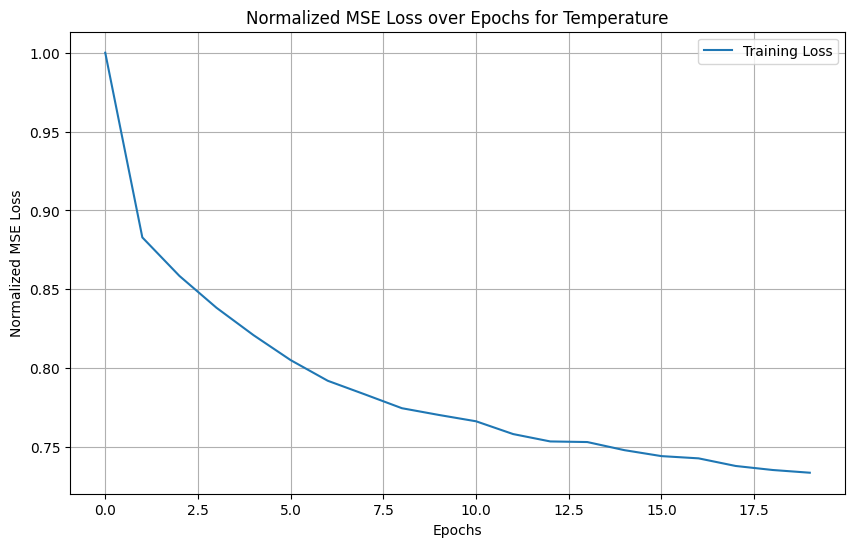

Epoch 1/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 9s 989us/step - loss: 52.1338 - val_loss: 36.6343
Epoch 2/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 976us/step - loss: 34.3928 - val_loss: 48.2416
Epoch 3/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 987us/step - loss: 34.1021 - val_loss: 33.2074
Epoch 4/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 996us/step - loss: 33.2362 - val_loss: 34.7738
Epoch 5/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 985us/step - loss: 33.4734 - val_loss: 33.8844
Epoch 6/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 999us/step - loss: 33.1404 - val_loss: 34.5559
Epoch 7/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 989us/step - loss: 33.2150 - val_loss: 32.6553
Epoch 8/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 997us/step - loss: 32.6603 - val_loss: 37.9261
Epoch 9/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 990us/step - loss: 32.3405 - val_loss: 34.5231
Epoch 10/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 996us/step - loss: 32.4740 - val_loss: 32.7573
Epoch 11/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 8s 990us/step - loss: 31.8937 - val_

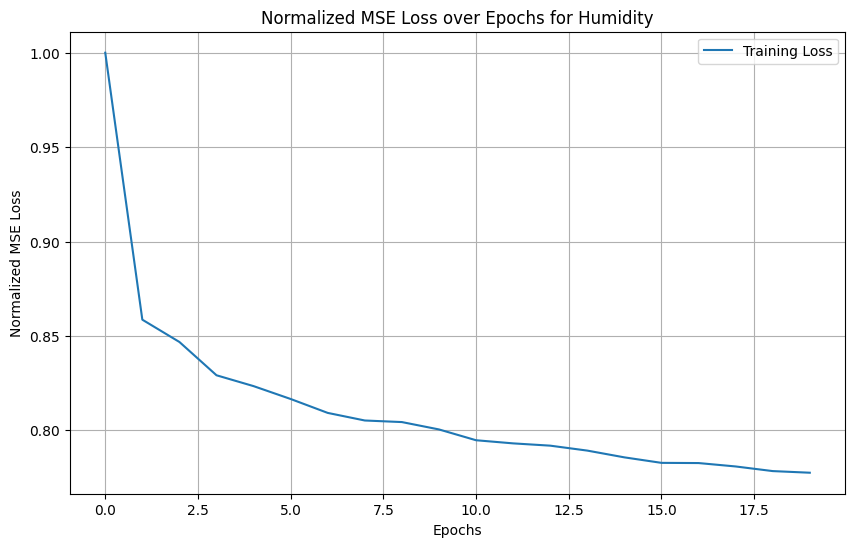

In [10]:
final_dataset = placement.replacing_missing_values(combined_data)

In [11]:
final_dataset.iloc[1000]

Time             2024-05-07 10:34:40
Temperature                     24.8
Humidity                        51.0
Sensor ID                      047D6
Sensor Name          047D6 T/RH IP67
Day                                7
Time_Instance               10:34:40
Year                            2024
Month                              5
flag                               0
Name: 1000, dtype: object

In [12]:
final_dataset.iloc[1001]

Time             2024-05-07 10:39:40
Temperature                    25.08
Humidity                       53.05
Sensor ID                      047D6
Sensor Name          047D6 T/RH IP67
Day                                7
Time_Instance               10:39:40
Year                            2024
Month                              5
flag                               1
Name: 1001, dtype: object

In [13]:
final_dataset.iloc[1002]

Time             2024-05-07 10:44:38
Temperature                     25.4
Humidity                        51.5
Sensor ID                      047D6
Sensor Name          047D6 T/RH IP67
Day                                7
Time_Instance               10:44:38
Year                            2024
Month                              5
flag                               0
Name: 1002, dtype: object

In [14]:
final_dataset[(final_dataset['Sensor ID'] == '047D6') & (final_dataset['Day'] == 7) & (final_dataset['flag'] == 1)]

Time  Temperature  Humidity Sensor ID      Sensor Name  \
987  2024-05-07 09:29:43        21.42     58.95     047D6  047D6 T/RH IP67   
1001 2024-05-07 10:39:40        25.08     53.05     047D6  047D6 T/RH IP67   
4528 2024-05-07 15:04:30        27.86     33.45     047D6  047D6 T/RH IP67   
4635 2024-05-07 22:59:12        14.06     79.70     047D6  047D6 T/RH IP67   

      Day Time_Instance  Year  Month  flag  
987     7      09:29:43  2024      5     1  
1001    7      10:39:40  2024      5     1  
4528    7      15:04:30  2024      5     1  
4635    7      22:59:12  2024      5     1

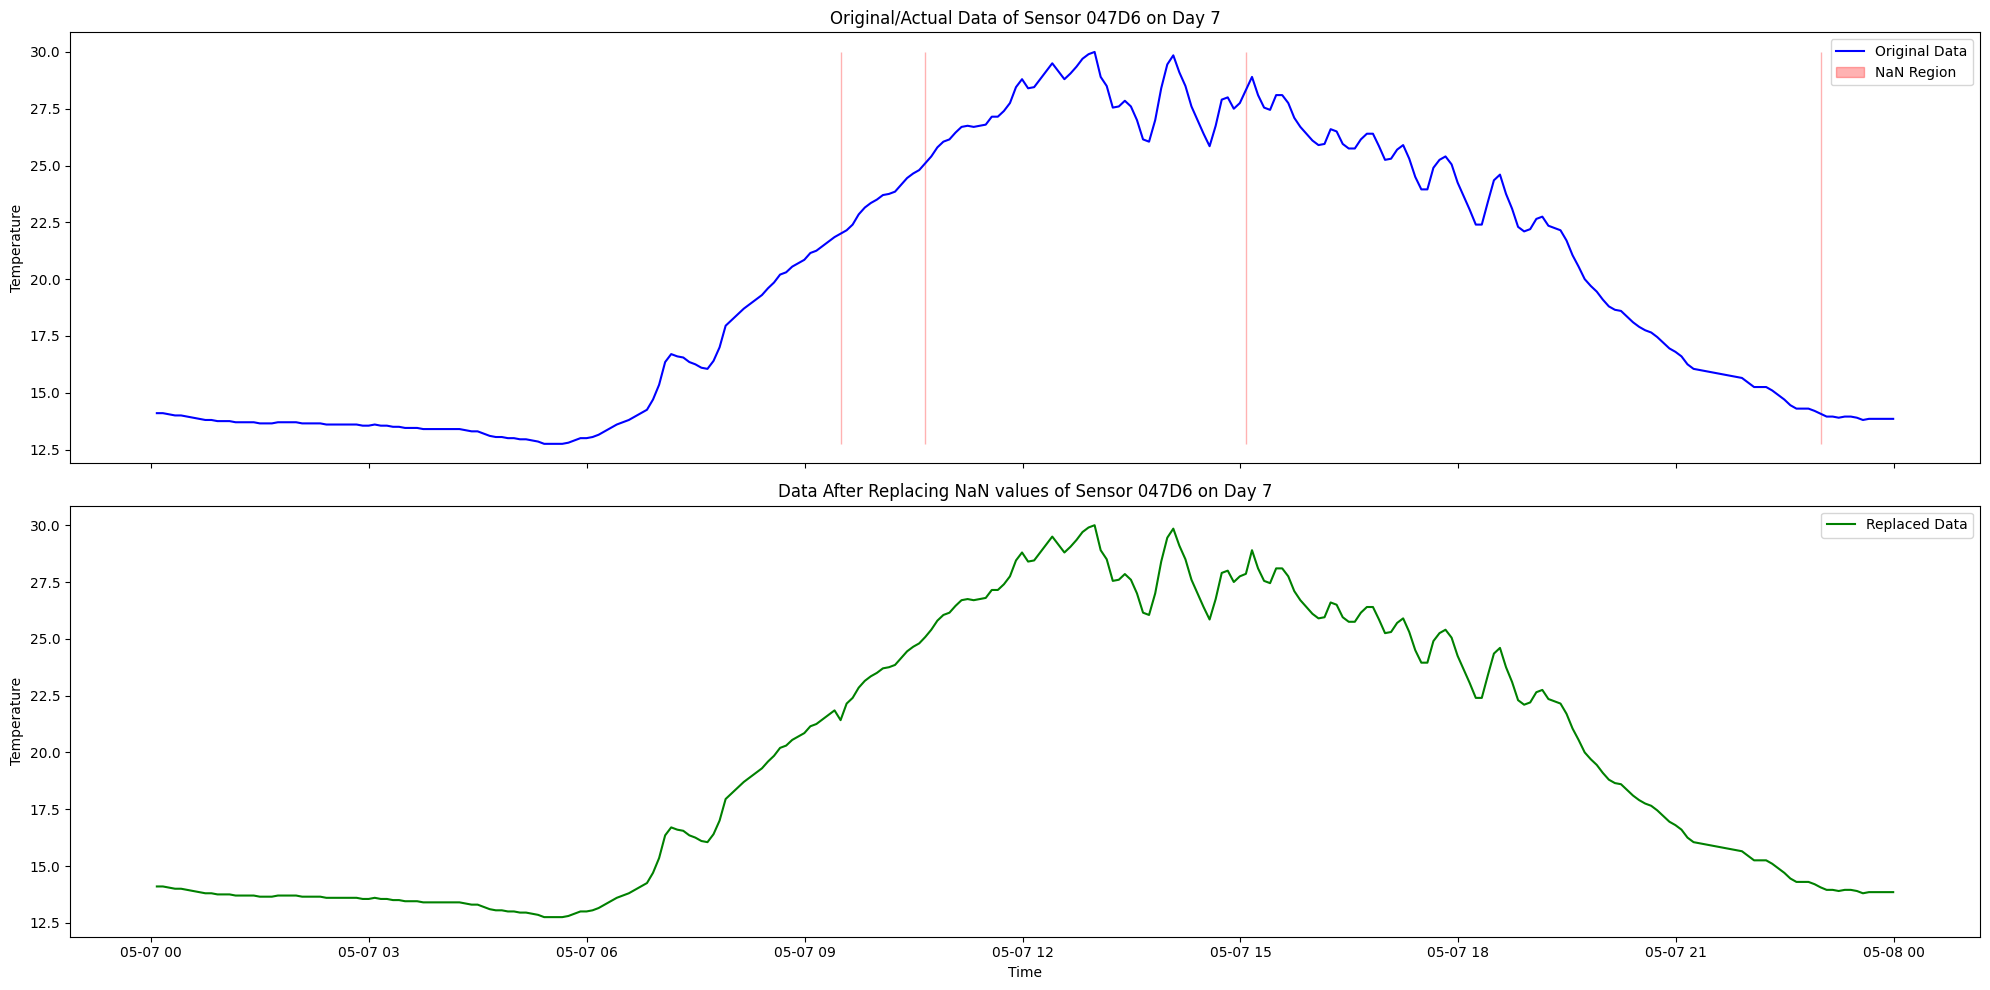

In [15]:
# Filter data for Sensor ID '047D6' and Day 7
sample_data = combined_data[combined_data['Sensor ID'] == '047D6']
sample_final_data = final_dataset[final_dataset['Sensor ID'] == '047D6']

Non_Empty_data = sample_data[sample_data['Day'] == 7]
final_days = sample_final_data[sample_final_data['Day'] == 7]

# Sort by 'Time'
Non_Empty_data = Non_Empty_data.sort_values(by='Time')
final_days = final_days.sort_values(by='Time')

# Identify NaN values
nan_mask = Non_Empty_data['Temperature'].isna()

# Set up the figure and axes
fig, axes = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# Plot the first DataFrame with shaded regions for NaNs
sns.lineplot(ax=axes[0], x='Time', y='Temperature', data=Non_Empty_data, color='blue', label='Original Data')

# Shading NaN regions - Masking Time where Temperature is NaN
axes[0].fill_between(Non_Empty_data['Time'], Non_Empty_data['Temperature'].min(), Non_Empty_data['Temperature'].max(), 
                     where=nan_mask, color='red', alpha=0.3, label='NaN Region')

axes[0].set_title('Original/Actual Data of Sensor 047D6 on Day 7')
axes[0].set_xlabel('')
axes[0].set_ylabel('Temperature')
axes[0].legend()

# Plot the second DataFrame (final data after replacing NaNs)
sns.lineplot(ax=axes[1], x='Time', y='Temperature', data=final_days, color='green', label='Replaced Data')
axes[1].set_title('Data After Replacing NaN values of Sensor 047D6 on Day 7')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Temperature')
axes[1].legend()

# Display the plots
plt.tight_layout()
plt.show()


In [16]:
final_dataset[final_dataset['flag'] == 1].head()

Time  Temperature  Humidity Sensor ID      Sensor Name  \
358  2024-05-05 05:01:20         9.27     84.58     047D6  047D6 T/RH IP67   
851  2024-05-20 08:31:34        13.59     85.29     047D6  047D6 T/RH IP67   
987  2024-05-07 09:29:43        21.42     58.95     047D6  047D6 T/RH IP67   
1001 2024-05-07 10:39:40        25.08     53.05     047D6  047D6 T/RH IP67   
1038 2024-05-20 15:01:20        29.98     46.27     047D6  047D6 T/RH IP67   

      Day Time_Instance  Year  Month  flag  
358     5      05:01:20  2024      5     1  
851    20      08:31:34  2024      5     1  
987     7      09:29:43  2024      5     1  
1001    7      10:39:40  2024      5     1  
1038   20      15:01:20  2024      5     1

In [17]:
anomalies_list = []
temperature_color = 'green'
humidity_color = 'blue'

for sensor_id, sensor_data in final_dataset.groupby('Sensor ID'):
    sensor_anomalies = anomaly_detection.detect_anomalies(sensor_data, sensor_id, temperature_color, humidity_color)
    anomalies_list.append(sensor_anomalies)

all_anomalies = pd.concat(anomalies_list)

In [18]:
non_anomalous_data = all_anomalies[(all_anomalies['Temperature_anomaly'] == 0) & (all_anomalies['Humidity_anomaly'] == 0)]

X_train = non_anomalous_data[['Temperature', 'Humidity']]
y_train_temp = non_anomalous_data['Temperature']
y_train_humidity = non_anomalous_data['Humidity']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [19]:
mlp_temp = anomaly_detection.training_anomaly_model(X_train_scaled, y_train_temp, '', 'temperature')

Epoch 1/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 11.1115 - val_loss: 1.5432e-04
Epoch 2/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 6s 974us/step - loss: 0.0025 - val_loss: 1.0936e-04
Epoch 3/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 6s 967us/step - loss: 0.0017 - val_loss: 7.5050e-05
Epoch 4/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 6s 979us/step - loss: 0.0018 - val_loss: 0.0084
Epoch 5/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 6s 969us/step - loss: 0.0014 - val_loss: 1.2084e-05
Epoch 6/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 6s 968us/step - loss: 7.7701e-04 - val_loss: 0.0045
Epoch 7/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 6s 980us/step - loss: 0.0011 - val_loss: 5.0454e-06
Epoch 8/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 6s 975us/step - loss: 0.0011 - val_loss: 4.0067e-06
Epoch 9/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 6s 979us/step - loss: 5.3088e-04 - val_loss: 0.0162
Epoch 10/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 6s 994us/step - loss: 0.0022 - val_loss: 3.7594e-06
Epoch 11/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 7

In [20]:
mlp_humidity = anomaly_detection.training_anomaly_model(X_train_scaled, '', y_train_humidity, 'humidity')

Epoch 1/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 216.5546 - val_loss: 0.0013
Epoch 2/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 6s 974us/step - loss: 0.0124 - val_loss: 0.0079
Epoch 3/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 6s 963us/step - loss: 0.0123 - val_loss: 0.0991
Epoch 4/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 6s 969us/step - loss: 0.0119 - val_loss: 1.9056e-04
Epoch 5/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 6s 963us/step - loss: 0.0119 - val_loss: 2.6761e-04
Epoch 6/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 6s 953us/step - loss: 0.0088 - val_loss: 4.6249e-04
Epoch 7/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 6s 982us/step - loss: 0.0098 - val_loss: 5.1984e-04
Epoch 8/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 6s 966us/step - loss: 0.0101 - val_loss: 0.0034
Epoch 9/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 6s 963us/step - loss: 0.0114 - val_loss: 4.9581e-05
Epoch 10/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 6s 974us/step - loss: 0.0110 - val_loss: 0.0048
Epoch 11/20
6169/6169 ━━━━━━━━━━━━━━━━━━━━ 6s 970us/step - loss: 0.0102 - val_l

In [21]:
anomalies = all_anomalies[(all_anomalies['Temperature_anomaly'] == 1) & (all_anomalies['Humidity_anomaly'] == 1)].copy()

X_anomalies = anomalies[['Temperature', 'Humidity']]
X_anomalies_scaled = scaler.transform(X_anomalies)

anomalies.loc[anomalies['Temperature_anomaly'] == 1, 'Temperature'] = 0
anomalies.loc[anomalies['Humidity_anomaly'] == 1, 'Humidity'] = 0

In [22]:
anomalies['Temperature'] = np.round(mlp_temp.predict(X_anomalies_scaled), 2)
anomalies['Humidity'] = np.round(mlp_humidity.predict(X_anomalies_scaled), 2)

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [23]:
all_anomalies.update(anomalies[['Temperature', 'Humidity']])
final_processed_data = all_anomalies.copy()

# final_anomalies = final_processed_data[(final_processed_data['Temperature_anomaly'] == 1) & (final_processed_data['Humidity_anomaly'] == 1)]

In [24]:
final_processed_data[(final_processed_data['Temperature_anomaly'] == 1) & (final_processed_data['Humidity_anomaly'] == 1)].head()

Time  Temperature   Humidity Sensor ID      Sensor Name  \
75823  2024-05-20 12:18:36    33.849998  31.320000     0474D  0474D T/RH IP67   
75873  2024-05-20 13:18:34    33.900002  29.350000     0474D  0474D T/RH IP67   
75877  2024-05-20 13:38:33    32.599998  28.530001     0474D  0474D T/RH IP67   
232588 2024-04-30 12:18:06    31.549999  34.000000     04750  04750 T/RH IP67   
232590 2024-04-30 12:28:04    31.600000  34.299999     04750  04750 T/RH IP67   

        Day Time_Instance  Year  Month  flag  Temperature_anomaly  \
75823    20      12:18:36  2024      5     0                    1   
75873    20      13:18:34  2024      5     0                    1   
75877    20      13:38:33  2024      5     0                    1   
232588   30      12:18:06  2024      4     0                    1   
232590   30      12:28:04  2024      4     0                    1   

        Humidity_anomaly  
75823                  1  
75873                  1  
75877                  1  
232588                 1  
232590                 1

In [25]:
lastday = final_processed_data['Time'].max().date()
last_day_records = final_processed_data[final_processed_data['Time'].dt.date == lastday]

sensor_sample_data = combined_data[combined_data['Time'].dt.date == lastday]

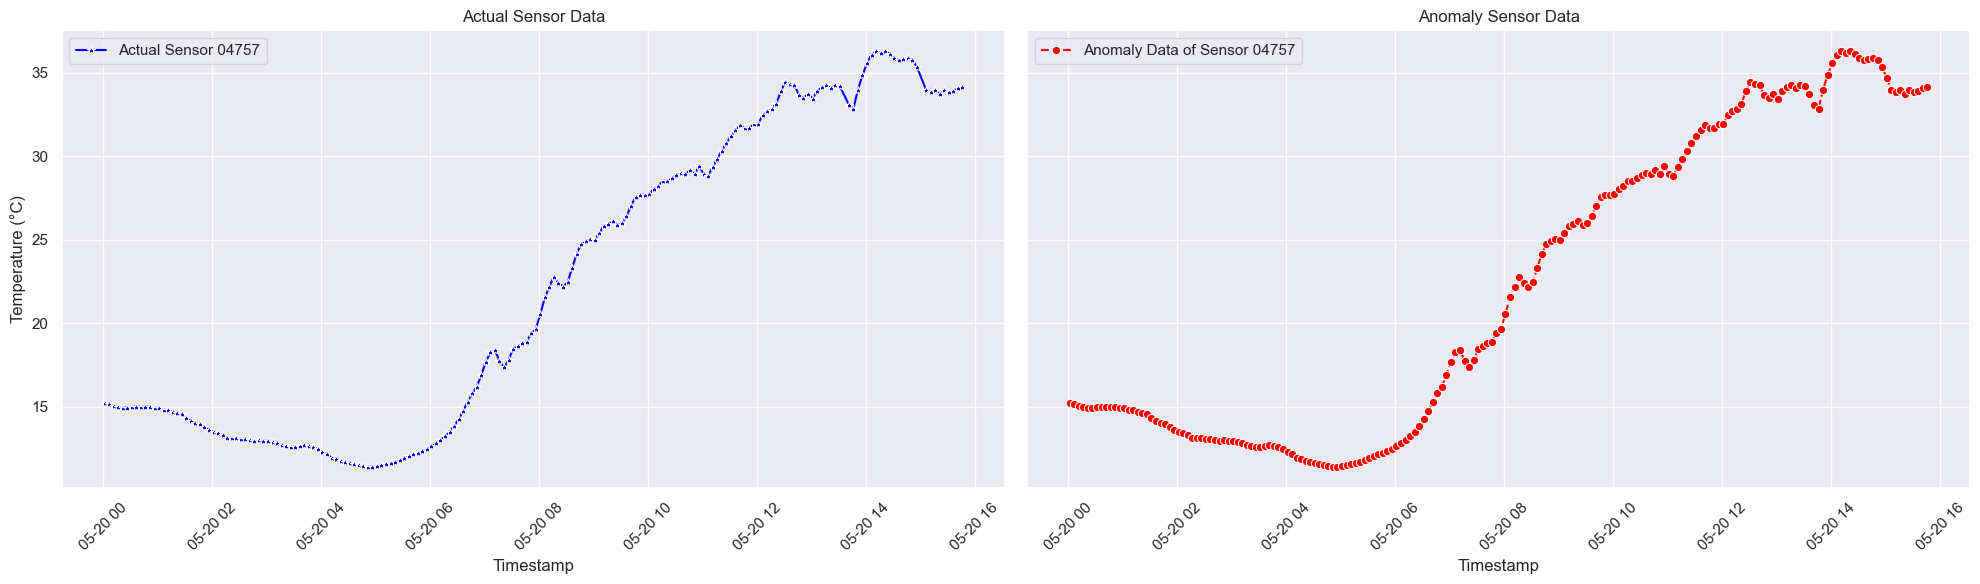

In [26]:
# Set style
sns.set(style="darkgrid")

# Create a figure with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Original data
sensor_data = sensor_sample_data[sensor_sample_data['Sensor ID'] == '04757']
sns.lineplot(ax=axs[0], x='Time', y='Temperature', data=sensor_data, 
             marker='*', color='blue',
             label='Actual Sensor 04757')

# Filtered data
filtered_sensor_data = last_day_records[last_day_records['Sensor ID'] == '04757']
sns.lineplot(ax=axs[1], x='Time', y='Temperature', data=filtered_sensor_data, 
             marker='o', color='red',
             linestyle='--', label='Anomaly Data of Sensor 04757')

# Titles and labels
axs[0].set_title('Actual Sensor Data')
axs[1].set_title('Anomaly Sensor Data')

for ax in axs:
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Temperature (°C)')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Compare/original_and_filtered_plots_side_by_side.png')
plt.show()

In [27]:
final_processed_data.to_csv('Combined_Data.csv', index=False)

In [28]:
final_dataset.columns

Index(['Time', 'Temperature', 'Humidity', 'Sensor ID', 'Sensor Name', 'Day',
       'Time_Instance', 'Year', 'Month', 'flag'],
      dtype='object')

In [29]:
placement.heatmap_video_gen(final_processed_data, output_dir, video_output, 'Temperature')

'Successfully generated the heatmap video.'

In [30]:
placement.heatmap_video_gen(final_processed_data, 'sensor_heatmaps/humidity', 'sensor_heatmaps_humidity_video.avi', 'Humidity')

'Successfully generated the heatmap video.'

#### Temeprature

In [31]:
temp_video_file_path = 'sensor_heatmaps_temperature_video.avi'

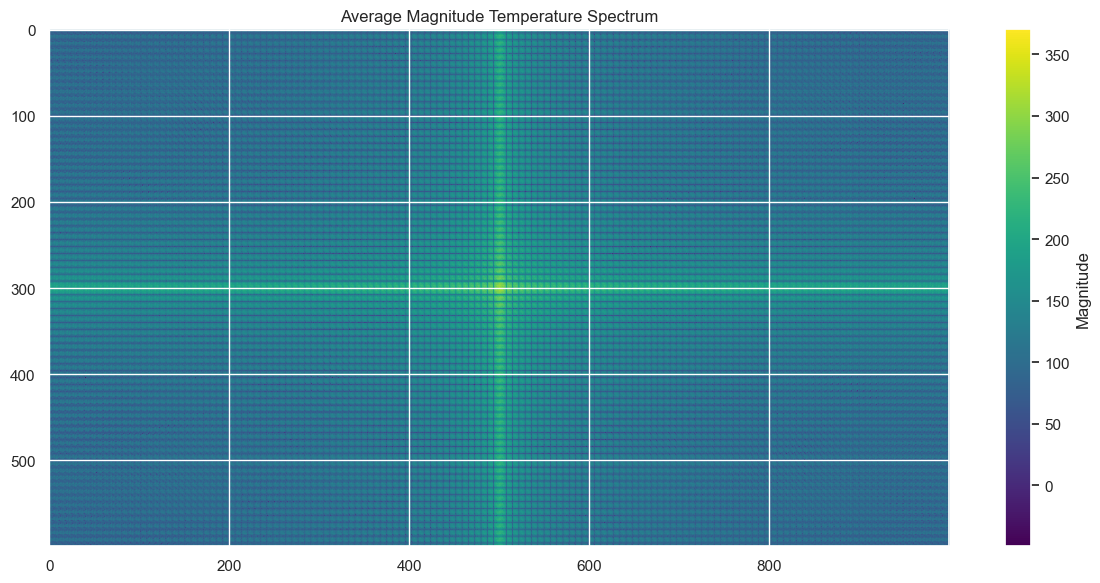

In [32]:
# Process the video and compute average FFT
fft_avg, magnitude_spectrum_avg = nyquist_throrm.process_video_fft_average(temp_video_file_path)

# Plot the average FFT signal and its magnitude spectrum
plt.figure(figsize=(12, 6))

# Compute the frequency values for the x-axis
freq_values = np.fft.fftfreq(fft_avg.shape[0])

# plt.subplot(1, 2, 1)
# plt.plot(freq_values, np.log(np.abs(fft_avg)), color='b')
# plt.title('Average FFT Signal (Time-Series)')
# plt.xlabel('Frequency')
# plt.ylabel('Log Amplitude')
# plt.grid(True)

# plt.subplot(1, 2, 2)
# plt.imshow(magnitude_spectrum_avg, cmap='gray')
# plt.title('Average Magnitude Temperature Spectrum')
# plt.axis('off')

# plt.tight_layout()
# plt.show()
plt.imshow(magnitude_spectrum_avg, cmap='viridis', aspect='auto')
plt.title('Average Magnitude Temperature Spectrum')
plt.colorbar(label='Magnitude')
plt.axis('on')

plt.tight_layout()
plt.show()

In [33]:
frame_count, width, height = nyquist_throrm.get_video_info(temp_video_file_path)
video_data = nyquist_throrm.read_video_file(temp_video_file_path)
results_step_1 = nyquist_throrm.reading_video(frame_count, width, height, video_data)

In [34]:
results_step_1

{'fft_data': array([[[ 9.75663484e+10-0.00000000e+00j,
           1.11927154e+09-2.34779432e+08j,
           9.45885337e+08-2.06916750e+09j, ...,
          -2.06208490e+09-9.86175154e+08j,
           9.45885337e+08+2.06916750e+09j,
           1.11927154e+09+2.34779432e+08j],
         [-5.47243996e+08-1.77603466e+09j,
          -4.66235799e+09-2.34538238e+07j,
          -1.36829743e+07-1.83440335e+09j, ...,
          -1.78056765e+09-3.06463308e+08j,
           2.70439015e+09-7.33670684e+08j,
           2.18512945e+09-7.79333157e+08j],
         [ 1.50349878e+09+1.18574822e+09j,
           4.18952822e+09-1.06743488e+09j,
          -1.31877178e+08+2.14383414e+09j, ...,
          -9.20949955e+06+7.08145231e+08j,
           1.21227840e+09+1.26503638e+09j,
          -1.50800352e+09+8.58091770e+08j],
         ...,
         [-6.23161683e+08+5.97684039e+09j,
          -1.58503207e+09-4.22630221e+09j,
          -1.81292922e+09+2.68647312e+08j, ...,
           3.37675566e+09+6.98458956e+08j,
     

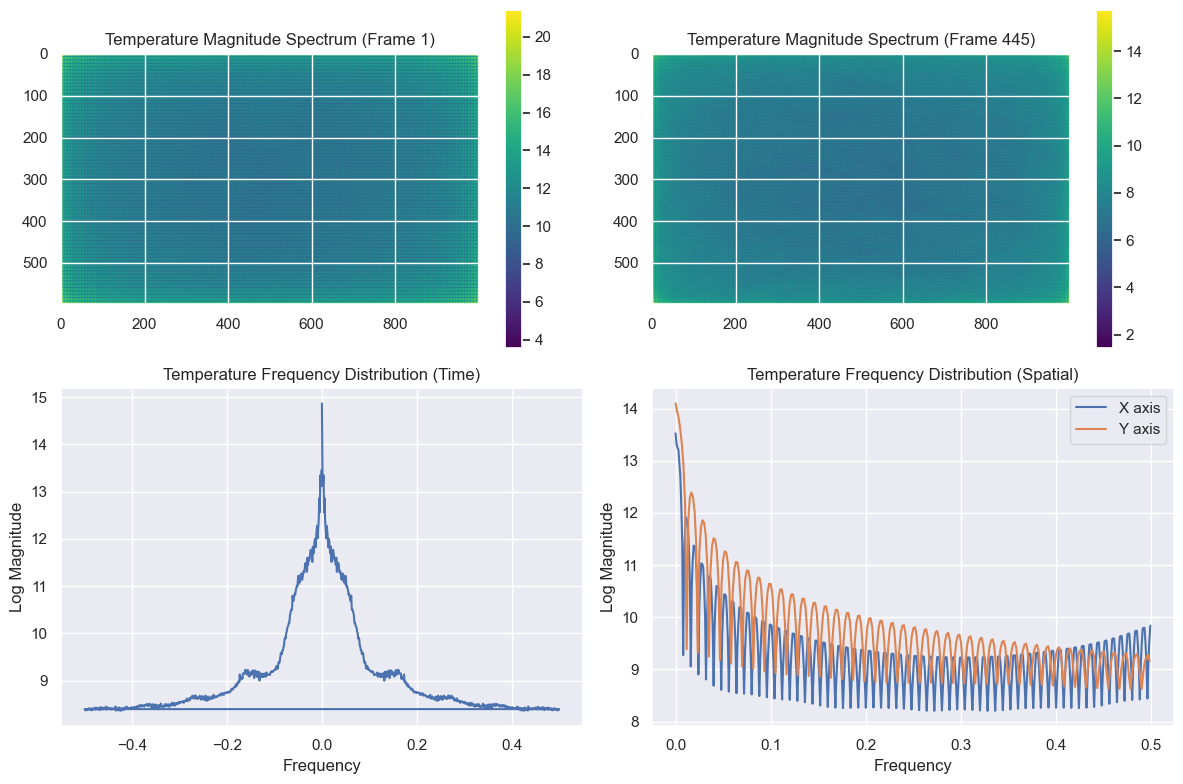

In [35]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(np.log1p(results_step_1['magnitude_spectrum'][1]), cmap='viridis')
plt.title("Temperature Magnitude Spectrum (Frame 1)")
plt.colorbar()

middle_frame = frame_count // 2
plt.subplot(2, 2, 2)
plt.imshow(np.log1p(results_step_1['magnitude_spectrum'][middle_frame]), cmap='viridis')
plt.title(f"Temperature Magnitude Spectrum (Frame {middle_frame})")
plt.colorbar()

plt.subplot(2, 2, 3)
plt.plot(results_step_1['frequencies_time'], np.log1p(np.mean(results_step_1['magnitude_spectrum'], axis=(1, 2))))
plt.title("Temperature Frequency Distribution (Time)")
plt.xlabel("Frequency")
plt.ylabel("Log Magnitude")

plt.subplot(2, 2, 4)
plt.plot(results_step_1['frequencies_x'][:width//2], np.log1p(np.mean(results_step_1['magnitude_spectrum'], axis=(0, 2))[:width//2]), label='X axis')
plt.plot(results_step_1['frequencies_y'][:height//2], np.log1p(np.mean(results_step_1['magnitude_spectrum'], axis=(0, 1))[:height//2]), label='Y axis')
plt.title("Temperature Frequency Distribution (Spatial)")
plt.xlabel("Frequency")
plt.ylabel("Log Magnitude")
plt.legend()

plt.tight_layout()
plt.show()


In [36]:
# Load sensor placement data
with open('sensor_placement.json', 'r') as file:
    sensor_placement = json.load(file)

# Convert lists to tuples and create reverse lookup dictionary
sensor_reverse_lookup = {tuple(v): k for k, v in sensor_placement.items()}

In [37]:
# Assuming fft_data is loaded from results_step_1["fft_data"]
fft_data = results_step_1["magnitude_spectrum"]

# Check the shape of fft_data
print(f"fft_data shape: {fft_data.shape}")

data_matrix = np.reshape(fft_data, (fft_data.shape[0], -1))

# Verify the reshaped data matrix
print(f"data_matrix shape: {data_matrix.shape}")

# Apply Proper Orthogonal Decomposition (POD) using SVD
U, S, Vt = svd(data_matrix, full_matrices=False)

# Calculate cumulative explained variance
explained_variance = np.cumsum(S) / np.sum(S)

# Determine the number of modes needed to reach the desired explained variance
desired_variance = 0.925 # 925% explained variance
num_modes = np.searchsorted(explained_variance, desired_variance) + 1

# Select a subset of modes
reduced_data = U[:, :num_modes] @ np.diag(S[:num_modes])

# Perform QR decomposition with column pivoting on reduced data
Q, R, P = qr(reduced_data.T, pivoting=True)

num_sensors = num_modes
selected_sensors_indices = P[:num_sensors]

selected_sensors = []
grid_rows, grid_cols = 8, 7
grid_size = grid_rows * grid_cols

# Identify the selected sensors from indices
for idx in selected_sensors_indices:
    rem = idx % grid_size
    x, y = divmod(rem, grid_cols)
    sensor_id = sensor_reverse_lookup.get((grid_rows - x, y + 1))
    selected_sensors.append([grid_rows - x, y + 1])

print("Selected sensor locations (row, column):", selected_sensors)

fft_data shape: (891, 600, 1000)
data_matrix shape: (891, 600000)
Selected sensor locations (row, column): [[8, 1], [1, 2], [8, 2], [2, 7], [8, 3], [8, 4], [1, 1], [2, 5], [8, 6], [8, 5], [2, 6], [2, 4], [8, 7], [7, 1], [2, 3], [7, 3], [2, 1], [7, 2], [2, 2], [3, 7], [7, 4], [7, 7], [7, 5], [3, 6], [4, 3], [4, 7], [3, 1], [6, 4], [6, 2], [3, 4], [5, 1], [3, 2], [5, 3], [4, 1]]


#### Humidity

In [38]:
humidity_video_file_path = 'sensor_heatmaps_humidity_video.avi'

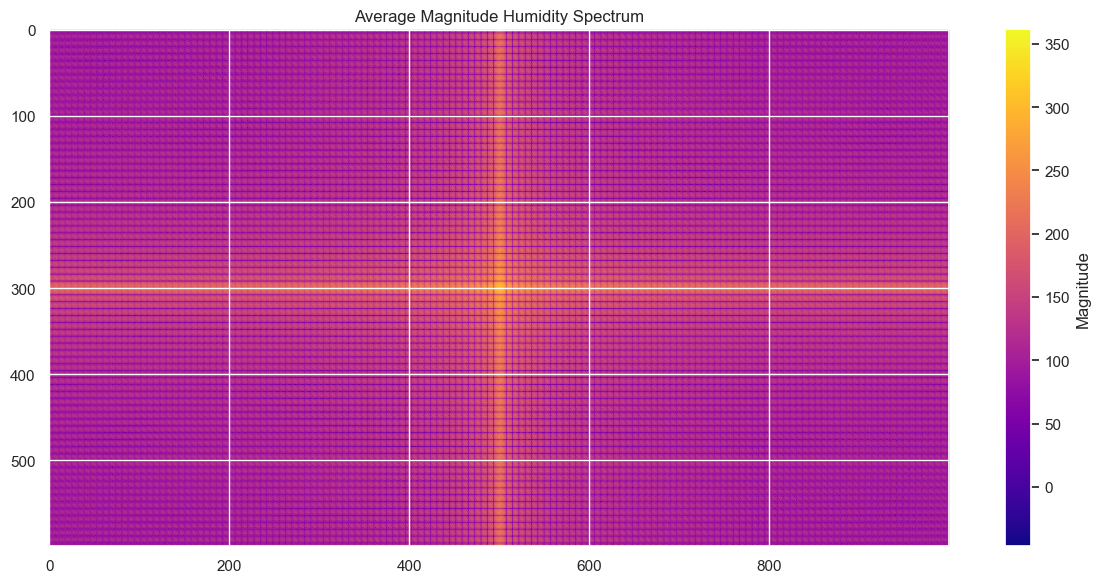

In [39]:
# Process the video and compute average FFT
fft_humid_avg, magnitude_humid_spectrum_avg = nyquist_throrm.process_video_fft_average(humidity_video_file_path)

# Plot the average FFT signal and its magnitude spectrum
plt.figure(figsize=(12, 6))

# Compute the frequency values for the x-axis
freq_humid_values = np.fft.fftfreq(fft_humid_avg.shape[0])

plt.imshow(magnitude_humid_spectrum_avg, cmap='plasma', aspect='auto')
plt.title('Average Magnitude Humidity Spectrum')
plt.colorbar(label='Magnitude')
plt.axis('on')

plt.tight_layout()
plt.show()

In [40]:
humid_frame_count, humid_width, humid_height = nyquist_throrm.get_video_info(humidity_video_file_path)
humid_video_data = nyquist_throrm.read_video_file(humidity_video_file_path)
humid_results_step_1 = nyquist_throrm.reading_video(humid_frame_count, humid_width, humid_height, humid_video_data)

In [41]:
humid_results_step_1

{'fft_data': array([[[ 6.27312453e+10-0.00000000e+00j,
          -6.34231986e+08-1.84649703e+09j,
          -3.32606058e+07+1.27807556e+09j, ...,
           2.25691627e+09+2.94271343e+09j,
          -3.32606058e+07-1.27807556e+09j,
          -6.34231986e+08+1.84649703e+09j],
         [-2.43185971e+08+2.99042773e+09j,
           3.76764008e+09-7.22747882e+08j,
           5.58051064e+07+3.47419584e+09j, ...,
           1.44191008e+09-2.92517175e+08j,
          -6.47149648e+08+3.34519245e+09j,
          -4.04776149e+09-2.20065210e+08j],
         [-2.14699902e+09+4.54177352e+08j,
          -6.25096200e+09+2.33067438e+09j,
           1.06547432e+08-1.06912246e+09j, ...,
          -9.22496921e+08-1.11925988e+09j,
          -6.47109855e+08-3.64271280e+08j,
           3.20528269e+09-3.78333823e+09j],
         ...,
         [ 1.81072535e+09-6.86086420e+09j,
          -1.62741739e+08+3.95894601e+09j,
           1.13274458e+09-6.96608949e+08j, ...,
          -2.79321447e+09+3.08299183e+08j,
     

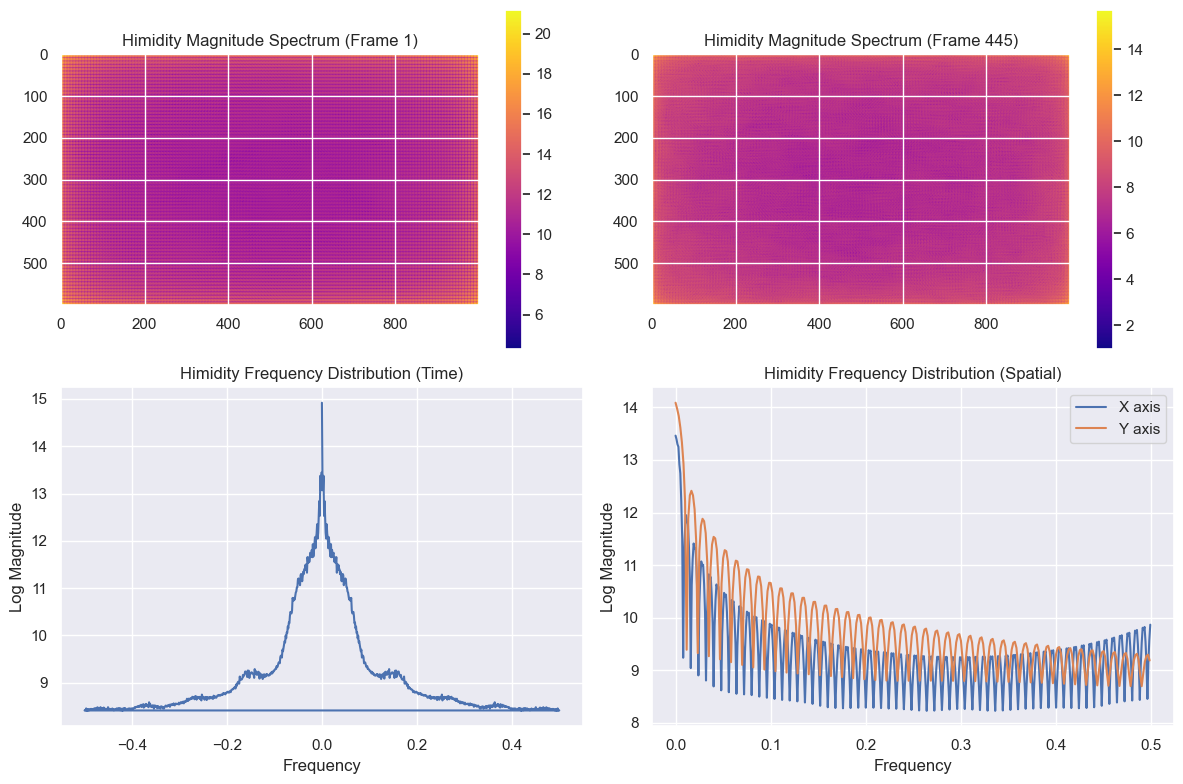

In [42]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(np.log1p(humid_results_step_1['magnitude_spectrum'][1]), cmap='plasma')
plt.title("Himidity Magnitude Spectrum (Frame 1)")
plt.colorbar()

middle_frame = humid_frame_count // 2
plt.subplot(2, 2, 2)
plt.imshow(np.log1p(humid_results_step_1['magnitude_spectrum'][middle_frame]), cmap='plasma')
plt.title(f"Himidity Magnitude Spectrum (Frame {middle_frame})")
plt.colorbar()

plt.subplot(2, 2, 3)
plt.plot(humid_results_step_1['frequencies_time'], np.log1p(np.mean(humid_results_step_1['magnitude_spectrum'], axis=(1, 2))))
plt.title("Himidity Frequency Distribution (Time)")
plt.xlabel("Frequency")
plt.ylabel("Log Magnitude")

plt.subplot(2, 2, 4)
plt.plot(humid_results_step_1['frequencies_x'][:humid_width//2], np.log1p(np.mean(humid_results_step_1['magnitude_spectrum'], axis=(0, 2))[:humid_width//2]), label='X axis')
plt.plot(humid_results_step_1['frequencies_y'][:humid_height//2], np.log1p(np.mean(humid_results_step_1['magnitude_spectrum'], axis=(0, 1))[:humid_height//2]), label='Y axis')
plt.title("Himidity Frequency Distribution (Spatial)")
plt.xlabel("Frequency")
plt.ylabel("Log Magnitude")
plt.legend()

plt.tight_layout()
plt.show()


In [43]:
# Assuming fft_data is loaded from results_step_1["fft_data"]
fft_humid_data = humid_results_step_1["magnitude_spectrum"]

# Check the shape of fft_data
print(f"humid_fft_data shape: {fft_humid_data.shape}")

humid_data_matrix = np.reshape(fft_humid_data, (fft_humid_data.shape[0], -1))

# Verify the reshaped data matrix
print(f"humid data_matrix shape: {humid_data_matrix.shape}")
# Apply Proper Orthogonal Decomposition (POD) using SVD

humid_U, humid_S, himid_Vt = svd(humid_data_matrix, full_matrices=False)
# Calculate cumulative explained variance
humid_explained_variance = np.cumsum(humid_S) / np.sum(humid_S)

# Determine the number of modes needed to reach the desired explained variance
humid_desired_variance = 0.925 # 92.5% explained variance
humid_num_modes = np.searchsorted(humid_explained_variance, humid_desired_variance) + 1

# Select a subset of modes
humid_reduced_data = humid_U[:, :humid_num_modes] @ np.diag(humid_S[:humid_num_modes])

# Perform QR decomposition with column pivoting on reduced data
Q, R, P = qr(humid_reduced_data.T, pivoting=True)

humid_num_sensors = humid_num_modes
selected_humid_sensors_indices = P[:humid_num_sensors]

selected_humid_sensors = []
grid_rows, grid_cols = 8, 7
grid_size = grid_rows * grid_cols

# Identify the selected sensors from indices
for idx in selected_humid_sensors_indices:
    rem = idx % grid_size
    x, y = divmod(rem, grid_cols)
    sensor_id = sensor_reverse_lookup.get((grid_rows - x, y + 1))
    selected_humid_sensors.append([grid_rows - x, y + 1])

print("Selected sensor locations (row, column):", selected_humid_sensors)

humid_fft_data shape: (891, 600, 1000)
humid data_matrix shape: (891, 600000)
Selected sensor locations (row, column): [[8, 1], [2, 7], [8, 4], [8, 2], [1, 2], [8, 3], [1, 1], [8, 6], [2, 5], [8, 5], [2, 6], [2, 4], [8, 7], [2, 3], [7, 1], [2, 1], [7, 3], [7, 4], [3, 7], [7, 2], [2, 2], [7, 5], [4, 5], [4, 2], [6, 6], [5, 2], [3, 6], [5, 1], [5, 6], [4, 3], [6, 4], [4, 7], [6, 5], [5, 5], [5, 3], [5, 4], [6, 3], [4, 6], [3, 3]]


#### Common Sensors

In [44]:
# Convert lists to sets
humid_set = set(map(tuple, selected_humid_sensors))
temp_set = set(map(tuple, selected_sensors))
# Find common sensors
common_sensors_set = humid_set.intersection(temp_set)
# Convert common sensors back to a list (if needed)
common_sensors = list(map(list, common_sensors_set))

# common_sensors.append([1,7])
# common_sensors.append([1,4])

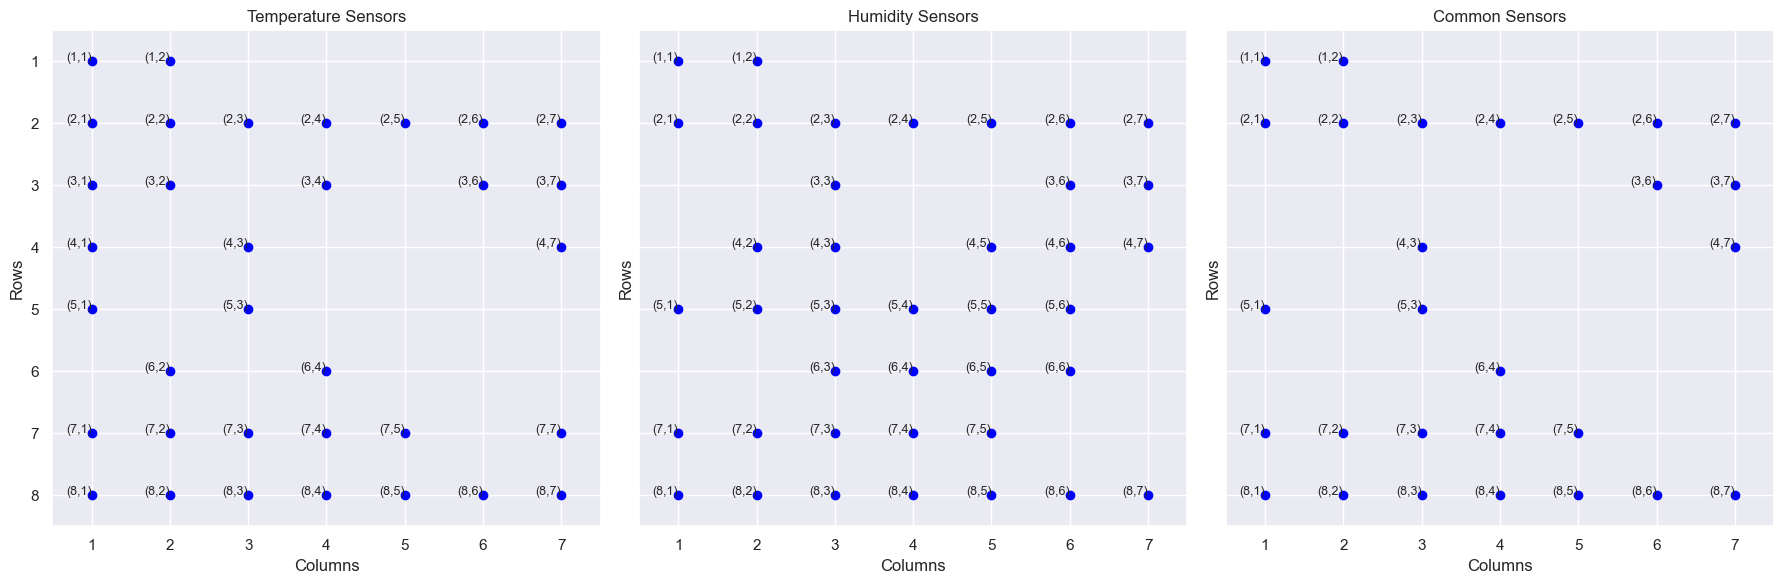

In [45]:
# Create a grid plot with three subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for selected sensors
axes[0].grid(True)
axes[0].set_xticks(range(1, 8))
axes[0].set_yticks(range(1, 9))
axes[0].set_xlim(0.5, 7.5)
axes[0].set_ylim(0.5, 8.5)
for (row, col) in selected_sensors:
    axes[0].scatter(col, row, c='blue')
    axes[0].text(col, row, f'({row},{col})', fontsize=9, ha='right')
axes[0].invert_yaxis()
axes[0].set_title("Temperature Sensors")
axes[0].set_xlabel("Columns")
axes[0].set_ylabel("Rows")

# Plot for selected humid sensors
axes[1].grid(True)
axes[1].set_xticks(range(1, 8))
axes[1].set_yticks(range(1, 9))
axes[1].set_xlim(0.5, 7.5)
axes[1].set_ylim(0.5, 8.5)
for (row, col) in selected_humid_sensors:
    axes[1].scatter(col, row, c='blue')
    axes[1].text(col, row, f'({row},{col})', fontsize=9, ha='right')
axes[1].invert_yaxis()
axes[1].set_title("Humidity Sensors")
axes[1].set_xlabel("Columns")
axes[1].set_ylabel("Rows")

# Plot for common sensors
axes[2].grid(True)
axes[2].set_xticks(range(1, 8))
axes[2].set_yticks(range(1, 9))
axes[2].set_xlim(0.5, 7.5)
axes[2].set_ylim(0.5, 8.5)
for (row, col) in common_sensors:
    axes[2].scatter(col, row, c='blue')
    axes[2].text(col, row, f'({row},{col})', fontsize=9, ha='right')
axes[2].invert_yaxis()
axes[2].set_title("Common Sensors")
axes[2].set_xlabel("Columns")
axes[2].set_ylabel("Rows")

# Display the plot
plt.tight_layout()
plt.show()

#### Re-Generating the Heatmaps with Reduced Sensors

In [46]:
with open('sensor_placement.json','r') as sensor:
    data = json.load(sensor)

In [47]:
selected_sensors_list = [key for key, value in data.items() if value in common_sensors]

In [48]:
reduced_sensor_data = pd.read_csv('Combined_Data.csv')

In [49]:
not_selected_sensors_list = [key for key, value in data.items() if value not in common_sensors]

In [50]:
not_reduced_sensor_data = reduced_sensor_data[reduced_sensor_data['Sensor ID'].isin(not_selected_sensors_list)]

In [51]:
reduced_sensors = reduced_sensor_data[reduced_sensor_data['Sensor ID'].isin(selected_sensors_list)]

In [52]:
reduced_sensors['Sensor ID'].unique()

array(['0474D', '04754', '04757', '0475A', '0475C', '0475D', '04763',
       '04765', '0476E', '04771', '04787', '04789', '0478E', '0479B',
       '047AA', '047AD', '047B8', '047BB', '047BC', '047C2', '047C7',
       '047C9', '047CA', '047CB', '047CE', '047D6', '047F7', '0480E'],
      dtype=object)

### Neural Networks

In [53]:
# Convert 'Time' column to datetime
reduced_sensor_data.loc[:, 'Time'] = pd.to_datetime(reduced_sensor_data['Time'])

# Get the latest date in the dataset
latest_date = reduced_sensor_data['Time'].max()

# Extract the latest month and year
latest_month = latest_date.month
latest_year = latest_date.year

# Filter the DataFrame for the latest month and year
latest_month_data_1 = reduced_sensor_data[(reduced_sensor_data['Year'] == latest_year) & (reduced_sensor_data['Month'] == latest_month)]


sample_dataset_1 = latest_month_data_1.groupby('Sensor ID', observed=False).apply(lambda x: x.tail(10000)).reset_index(drop=True)

# Use .loc to avoid SettingWithCopyWarning
sample_dataset_1['Sensor ID'] = pd.Categorical(sample_dataset_1['Sensor ID'], categories=list(data.keys()), ordered=True)
reduced_df_sorted_1 = sample_dataset_1.sort_values(by='Sensor ID')
reduced_df_sorted_1 = reduced_df_sorted_1[~pd.isna(reduced_df_sorted_1['Sensor ID'])]
reduced_df_sorted_1.loc[:, 'Sensor ID'] = reduced_df_sorted_1['Sensor ID'].astype(str)
reduced_df_sorted_1.reset_index(drop=True, inplace=True)

C:\Users\malla\AppData\Local\Temp\ipykernel_10592\1022417582.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_dataset_1 = latest_month_data_1.groupby('Sensor ID', observed=False).apply(lambda x: x.tail(10000)).reset_index(drop=True)


In [54]:
# Convert 'Time' column to datetime
reduced_sensors.loc[:, 'Time'] = pd.to_datetime(reduced_sensors['Time'])

# Get the latest date in the dataset
latest_date = reduced_sensors['Time'].max()

# Extract the latest month and year
latest_month = latest_date.month
latest_year = latest_date.year

# Filter the DataFrame for the latest month and year
latest_month_data = reduced_sensors[(reduced_sensors['Year'] == latest_year) & (reduced_sensors['Month'] == latest_month)]

sample_dataset = latest_month_data.groupby('Sensor ID', observed=False).apply(lambda x: x.tail(10000)).reset_index(drop=True)

# Use .loc to avoid SettingWithCopyWarning
sample_dataset['Sensor ID'] = pd.Categorical(sample_dataset['Sensor ID'], categories=selected_sensors_list, ordered=True)
reduced_df_sorted = sample_dataset.sort_values(by='Sensor ID')
reduced_df_sorted = reduced_df_sorted[~pd.isna(reduced_df_sorted['Sensor ID'])]
reduced_df_sorted.loc[:, 'Sensor ID'] = reduced_df_sorted['Sensor ID'].astype(str)
reduced_df_sorted.reset_index(drop=True, inplace=True)

C:\Users\malla\AppData\Local\Temp\ipykernel_10592\2484819331.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_dataset = latest_month_data.groupby('Sensor ID', observed=False).apply(lambda x: x.tail(10000)).reset_index(drop=True)


#### Predicting Temperature

In [55]:
x_temp, y_temp = Alternative_filling_method.standerdizing_data(reduced_df_sorted,reduced_df_sorted_1,'Temperature')

x_temp = Alternative_filling_method.shuffle_data(x_temp)
y_temp = Alternative_filling_method.shuffle_data(y_temp)

In [56]:

# Split the data into 70% training+validation and 30% test set
x_temp_train_val, x_temp_test, y_temp_train_val, y_temp_test = train_test_split(x_temp, y_temp, test_size=0.3, random_state=0)

# Now split the training+validation set into 70% training and 30% validation set
x_temp_train, x_temp_val, y_temp_train, y_temp_val = train_test_split(x_temp_train_val, y_temp_train_val, test_size=0.3, random_state=0)

In [57]:
predicting_temp_model = Alternative_filling_method.neural_network_model(x_temp, y_temp)

In [58]:
predicting_temp_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 28)             │           812 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28)             │           112 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 56)             │         1,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 56)             │           224 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 56)             │         3,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56)             │           224 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 56)             │         3,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 56)             │           224 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 56)             │         3,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56)             │           224 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 56)             │         3,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56)             │           224 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 56)             │         3,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56)             │           224 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 400,596 (1.53 MB)

 Trainable params: 395,612 (1.51 MB)

 Non-trainable params: 4,984 (19.47 KB)

In [59]:
history_temp = predicting_temp_model.fit(x_temp_train, y_temp_train, epochs=100, batch_size=16, validation_data=(x_temp_val, y_temp_val))

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - loss: 405.0159 - val_loss: 394.9177
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 305.1666 - val_loss: 284.7728
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 223.4930 - val_loss: 230.1885
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 162.1962 - val_loss: 281.7141
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 118.9051 - val_loss: 318.9059
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 93.7097 - val_loss: 361.1535
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 81.3421 - val_loss: 364.4862
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 75.2470 - val_loss: 352.8896
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 73.2338 - val_loss: 383.2494
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 72.0108 - val_loss: 424.8617
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 71.5373 - val_loss: 414.7266
E

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 373.2911
Model Loss on Test Dataset: 334.2726135253906


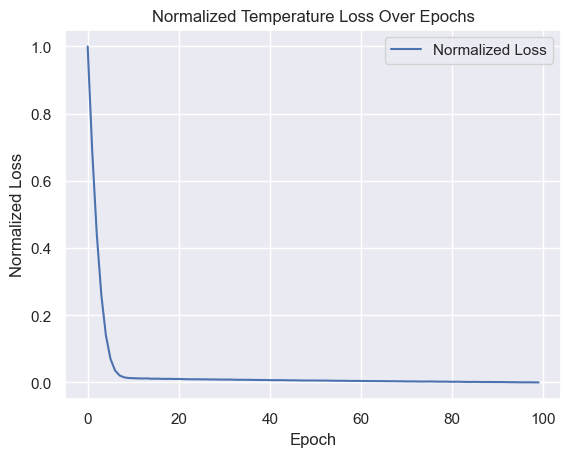

In [60]:
loss_temp = predicting_temp_model.evaluate(x_temp_test, y_temp_test)
print(f"Model Loss on Test Dataset: {loss_temp}")
# Assuming `history.history['loss']` contains your loss values
loss_temp_values = history_temp.history['loss']

# Normalize the loss values
min_temp_loss = np.min(loss_temp_values)
max_temp_loss = np.max(loss_temp_values)
normalized_temp_loss = (loss_temp_values - min_temp_loss) / (max_temp_loss - min_temp_loss)

# Plot the normalized loss values
plt.plot(normalized_temp_loss, label='Normalized Loss')
plt.xlabel('Epoch')
plt.ylabel('Normalized Loss')
plt.title('Normalized Temperature Loss Over Epochs')
plt.legend()
plt.show()

In [61]:
predictions_temp_over_time = Alternative_filling_method.predict_future_temperatures(predicting_temp_model, reduced_df_sorted, reduced_df_sorted_1, selected_sensors_list, 'Temperature', num_steps=102)
predictions_temp_over_time = pd.concat(predictions_temp_over_time,ignore_index=True)
predictions_temp_over_time['error_temperature'] = np.abs(predictions_temp_over_time['Predicted_Temperature'] - predictions_temp_over_time['Actual_Temperature'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━

In [62]:
error_temp_toutput_dir = 'error_frames/temperature'
error_temp_frames = Alternative_filling_method.error_plotting(error_temp_toutput_dir,predictions_temp_over_time,'error_temperature', True)
reconstrucing_video.video_generation(error_temp_frames,'Error_temp_video.avi')

'Video saved as: Error_temp_video.avi'

In [63]:
temp_output_dir = 'reconstructed_heatmaps/temperature'
predicted_temp_frames = Alternative_filling_method.error_plotting(temp_output_dir,predictions_temp_over_time,'Predicted_Temperature', False)
reconstrucing_video.video_generation(predicted_temp_frames,'reconstructed_temp_heatmapvideo.avi')

'Video saved as: reconstructed_temp_heatmapvideo.avi'

In [64]:
# Paths to your video files
video1_path = 'reconstructed_temp_heatmapvideo.avi'
video2_path = 'sensor_heatmaps_temperature_video.avi'

# Extract frames
video1_frames = testing_videos.extract_frames(video1_path)
video2_frames = testing_videos.extract_frames(video2_path)

# Compare videos
similarity_scores = testing_videos.compare_videos(video1_frames, video2_frames)

# Compute overall similarity
overall_score = testing_videos.overall_similarity(similarity_scores)

# Perform statistical tests
statistical_results = testing_videos.perform_statistical_tests(similarity_scores)

print(f"Overall similarity score for Temperature: {overall_score}")
print(f"T-test: T-statistic for Temperature = {statistical_results['t-test'][0]}, P-value = {statistical_results['t-test'][1]}")
print(f"Wilcoxon signed-rank test for Temperature: Statistic = {statistical_results['Wilcoxon signed-rank test'][0]}, P-value = {statistical_results['Wilcoxon signed-rank test'][1]}")
print(f"Kolmogorov-Smirnov test for Temperature: Statistic = {statistical_results['Kolmogorov-Smirnov test'][0]}, P-value = {statistical_results['Kolmogorov-Smirnov test'][1]}")


Overall similarity score for Temperature: 0.7759412403815331
T-test: T-statistic for Temperature = 834.2155809218951, P-value = 0.0
Wilcoxon signed-rank test for Temperature: Statistic = 197836.0, P-value = 0.9111965275043536
Kolmogorov-Smirnov test for Temperature: Statistic = 0.041579171433649253, P-value = 0.08929072300983854


#### Predicting Humidity

In [65]:
x_humid, y_humid = Alternative_filling_method.standerdizing_data(reduced_df_sorted,reduced_df_sorted_1,'Humidity')

x_humid = Alternative_filling_method.shuffle_data(x_humid)
y_humid = Alternative_filling_method.shuffle_data(y_humid)

In [66]:
# Split the data into 70% training+validation and 30% test set
x_humid_train_val, x_humid_test, y_humid_train_val, y_humid_test = train_test_split(x_humid, y_humid, test_size=0.3, random_state=0)

# Now split the training+validation set into 70% training and 30% validation set

x_humid_train, x_humid_val, y_humid_train, y_humid_val = train_test_split(x_humid_train_val, y_humid_train_val, test_size=0.3, random_state=0)
predicting_humid_model = Alternative_filling_method.neural_network_model(x_humid, y_humid)

In [67]:
history_humid = predicting_humid_model.fit(x_humid_train, y_humid_train, epochs=100, batch_size=16, validation_data=(x_humid_val, y_humid_val))

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 4760.1392 - val_loss: 4684.3325
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4349.7524 - val_loss: 4217.8384
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3924.5938 - val_loss: 3505.5227
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3505.4084 - val_loss: 2958.3206
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3082.0830 - val_loss: 2595.6340
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2683.1394 - val_loss: 2269.4146
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2297.7734 - val_loss: 1986.4508
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1935.4617 - val_loss: 1833.4910
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1615.0465 - val_loss: 1629.4543
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1329.4365 - val_loss: 1620.2782
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1088.

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1722.5491
Model Loss on Entire Dataset: 1527.245849609375


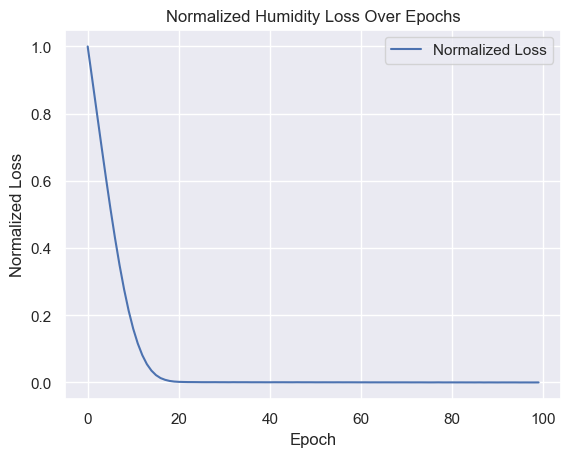

In [68]:
loss_humid = predicting_humid_model.evaluate(x_humid_test, y_humid_test)
print(f"Model Loss on Entire Dataset: {loss_humid}")
# Assuming `history.history['loss']` contains your loss values
loss_humid_values = history_humid.history['loss']

# Normalize the loss values
min_humid_loss = np.min(loss_humid_values)
max_humid_loss = np.max(loss_humid_values)
normalized_humid_loss = (loss_humid_values - min_humid_loss) / (max_humid_loss - min_humid_loss)

# Plot the normalized loss values
plt.plot(normalized_humid_loss, label='Normalized Loss')
plt.xlabel('Epoch')
plt.ylabel('Normalized Loss')
plt.title('Normalized Humidity Loss Over Epochs')
plt.legend()
plt.show()

In [69]:
predictions_humid_over_time = Alternative_filling_method.predict_future_temperatures(predicting_humid_model, reduced_df_sorted, reduced_df_sorted_1, selected_sensors_list, 'Humidity', num_steps=101)
predictions_humid_over_time = pd.concat(predictions_humid_over_time,ignore_index=True)
predictions_humid_over_time['error_humidity'] = np.abs(predictions_humid_over_time['Predicted_Humidity'] - predictions_humid_over_time['Actual_Humidity'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

In [70]:
error_humid_output_dir = 'error_frames/humidity'
error_humid_frames = Alternative_filling_method.error_plotting(error_humid_output_dir,predictions_humid_over_time,'error_humidity', True)
reconstrucing_video.video_generation(error_humid_frames,'Error_humid_video.avi')

'Video saved as: Error_humid_video.avi'

In [71]:
humid_output_dir = 'reconstructed_heatmaps/humidity'
predicted_humid_frames = Alternative_filling_method.error_plotting(humid_output_dir,predictions_humid_over_time,'Predicted_Humidity', False)
reconstrucing_video.video_generation(predicted_humid_frames,'reconstructed_humid_heatmapvideo.avi')

'Video saved as: reconstructed_humid_heatmapvideo.avi'

In [72]:
# Paths to your video files
video1_path = 'reconstructed_humid_heatmapvideo.avi'
video2_path = 'sensor_heatmaps_humidity_video.avi'

# Extract frames
video1_frames = testing_videos.extract_frames(video1_path)
video2_frames = testing_videos.extract_frames(video2_path)

# Compare videos
similarity_scores = testing_videos.compare_videos(video1_frames, video2_frames)

# Compute overall similarity
overall_score = testing_videos.overall_similarity(similarity_scores)

# Perform statistical tests
statistical_results = testing_videos.perform_statistical_tests(similarity_scores)

print(f"Overall similarity score of Humidity: {overall_score}")
print(f"T-test: T-statistic for humidity = {statistical_results['t-test'][0]}, P-value = {statistical_results['t-test'][1]}")
print(f"Wilcoxon fo humidity signed-rank test: Statistic = {statistical_results['Wilcoxon signed-rank test'][0]}, P-value = {statistical_results['Wilcoxon signed-rank test'][1]}")
print(f"Kolmogorov-Smirnov of humidity test: Statistic = {statistical_results['Kolmogorov-Smirnov test'][0]}, P-value = {statistical_results['Kolmogorov-Smirnov test'][1]}")


Overall similarity score of Humidity: 0.6737726650686849
T-test: T-statistic for humidity = 861.4321560080697, P-value = 0.0
Wilcoxon fo humidity signed-rank test: Statistic = 195425.0, P-value = 0.6706213232537529
Kolmogorov-Smirnov of humidity test: Statistic = 0.04023790948548245, P-value = 0.10867615131326291


#### Error

#### Average Error Temperature

In [73]:
error = [np.average(predictions_temp_over_time.groupby('Sensor ID', observed=False).nth(i-1)['error_temperature'].tolist()) for i in range(2, 102)]

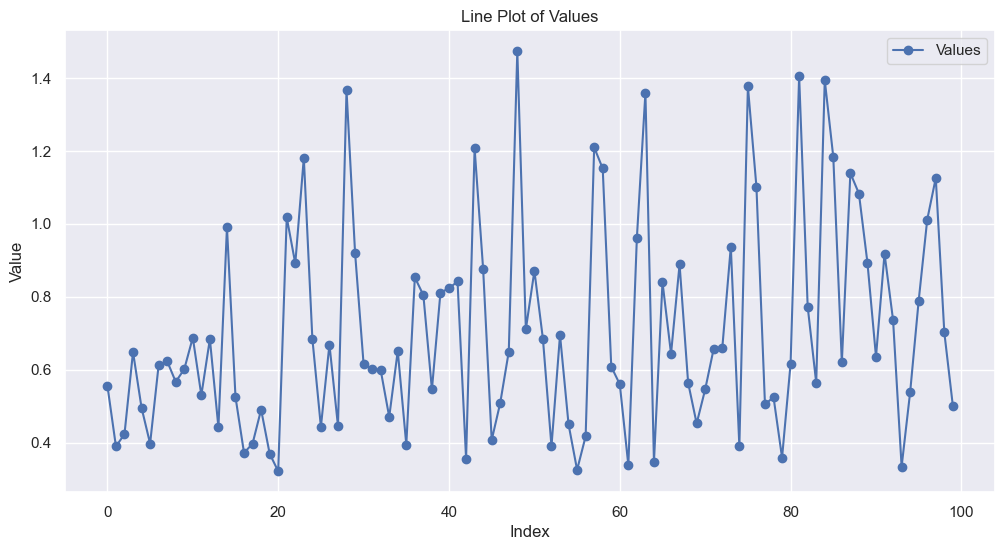

In [74]:
# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(error, marker='o', linestyle='-', color='b', label='Values')
plt.title('Line Plot of Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
import numpy as np
from scipy import stats
from sklearn.utils import resample

# Original data
temp_values = np.array(predictions_temp_over_time['Actual_Temperature'])
filtered_values = np.array(predictions_temp_over_time['Predicted_Temperature'])

# Bootstrap method for confidence intervals
def bootstrap_confidence_interval(data, confidence=0.95, n_bootstrap=10000):
    bootstrap_samples = np.array([np.mean(resample(data)) for _ in range(n_bootstrap)])
    lower_bound = np.percentile(bootstrap_samples, (1 - confidence) / 2 * 100)
    upper_bound = np.percentile(bootstrap_samples, (1 + confidence) / 2 * 100)
    return lower_bound, upper_bound

# Confidence interval for Temperature
ci_temp = bootstrap_confidence_interval(temp_values)
print(f"Bootstrap 95% Confidence Interval for Temperature Mean: {ci_temp}")

# Confidence interval for Predicted Temperature
ci_predicted = bootstrap_confidence_interval(filtered_values)
print(f"Bootstrap 95% Confidence Interval for Predicted Temperature Mean: {ci_predicted}")

# Mann-Whitney U Test
u_statistic, p_value = stats.mannwhitneyu(temp_values, filtered_values, alternative='two-sided')
print(f"U-statistic: {u_statistic}, P-value: {p_value}")

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the distributions of Temperature and Predicted value.")
else:
    print("There is no significant difference between the distributions of Temperature and Predicted value.")


Bootstrap 95% Confidence Interval for Temperature Mean: (19.72163274684874, 19.768991727941177)
Bootstrap 95% Confidence Interval for Predicted Temperature Mean: (19.74402618408203, 19.77871150970459)
U-statistic: 16212845.0, P-value: 0.56804313310214
There is no significant difference between the distributions of Temperature and Predicted value.


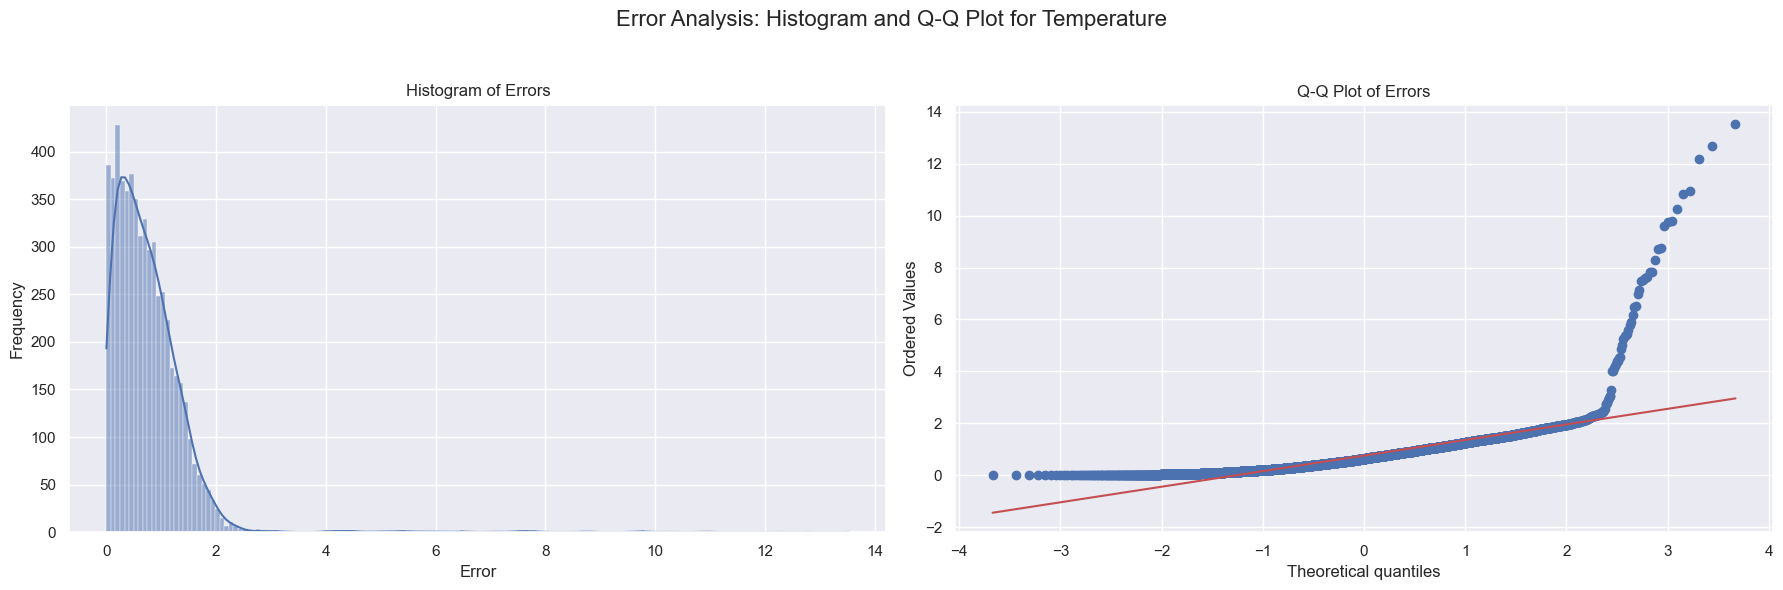

In [82]:
from scipy.stats import probplot

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot the histogram of errors on the first subplot
sns.histplot(predictions_temp_over_time['error_temperature'], kde=True, ax=axs[0])
axs[0].set_title('Histogram of Errors')
axs[0].set_xlabel('Error')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

# Plot the Q-Q plot of errors on the second subplot
probplot(predictions_temp_over_time['error_temperature'], dist="norm", plot=axs[1])
axs[1].set_title('Q-Q Plot of Errors')
axs[1].grid(True)

# Set a main title for the entire figure
fig.suptitle('Error Analysis: Histogram and Q-Q Plot for Temperature', fontsize=16)

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to accommodate the main title
plt.show()

In [77]:
correlation = predictions_temp_over_time['Actual_Temperature'].corr(predictions_temp_over_time['Predicted_Temperature'])
print(f"Correlation between actual and predicted temperatures: {correlation}")

# Plot the correlation
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Actual_Temperature', y='Predicted_Temperature', data=predictions_temp_over_time)
# plt.title(f'Correlation between Actual and Predicted Temperatures: {correlation:.2f}')
# plt.xlabel('Actual Temperature')
# plt.ylabel('Predicted Temperature')
# plt.grid(True)
# plt.show()

Correlation between actual and predicted temperatures: 0.0975487011132791


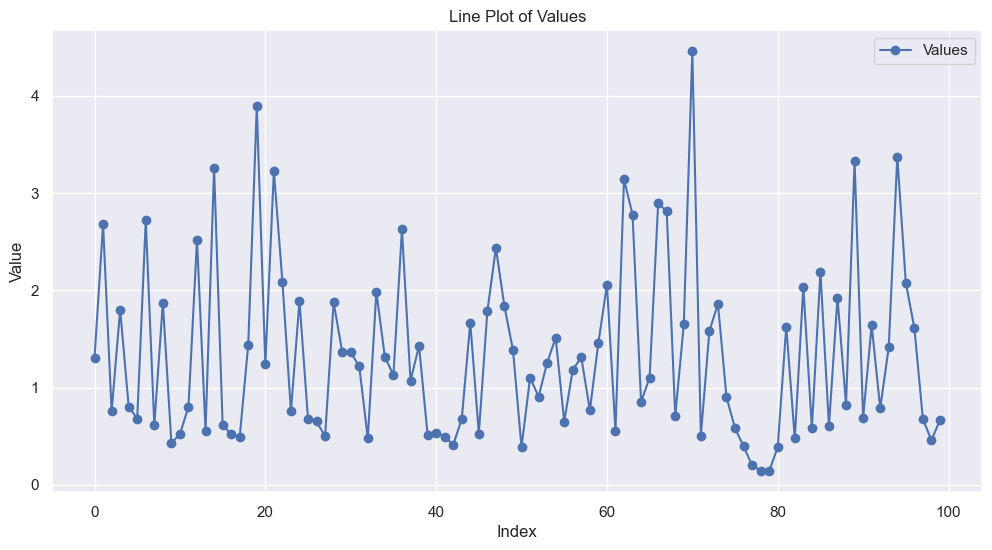

In [78]:
error_humid = [np.average(predictions_humid_over_time.groupby('Sensor ID', observed=False).nth(i-1)['error_humidity'].tolist()) for i in range(2, 102)]
# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(error_humid, marker='o', linestyle='-', color='b', label='Values')
plt.title('Line Plot of Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
import numpy as np
from scipy import stats
from sklearn.utils import resample

# Original data
humid_values = np.array(predictions_humid_over_time['Actual_Humidity'])
filtered_humid_values = np.array(predictions_humid_over_time['Predicted_Humidity'])

# Bootstrap method for confidence intervals
def bootstrap_confidence_interval(data, confidence=0.95, n_bootstrap=10000):
    bootstrap_samples = np.array([np.mean(resample(data)) for _ in range(n_bootstrap)])
    lower_bound = np.percentile(bootstrap_samples, (1 - confidence) / 2 * 100)
    upper_bound = np.percentile(bootstrap_samples, (1 + confidence) / 2 * 100)
    return lower_bound, upper_bound

# Confidence interval for Temperature
ci_humid = bootstrap_confidence_interval(humid_values)
print(f"Bootstrap 95% Confidence Interval for Humidity Mean: {ci_humid}")

# Confidence interval for Predicted Temperature
ci_predicted = bootstrap_confidence_interval(filtered_humid_values)
print(f"Bootstrap 95% Confidence Interval for Predicted Humidity Mean: {ci_predicted}")

# Mann-Whitney U Test
u_statistic, p_value = stats.mannwhitneyu(humid_values, filtered_humid_values, alternative='two-sided')
print(f"U-statistic: {u_statistic}, P-value: {p_value}")

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the distributions of Humidity and Predicted value.")
else:
    print("There is no significant difference between the distributions of Humidity and Predicted value.")

Bootstrap 95% Confidence Interval for Humidity Mean: (67.02751586810467, 67.14907978253183)
Bootstrap 95% Confidence Interval for Predicted Humidity Mean: (67.0017921447754, 67.07911701202393)
U-statistic: 16099975.0, P-value: 0.5461729740557724
There is no significant difference between the distributions of Humidity and Predicted value.


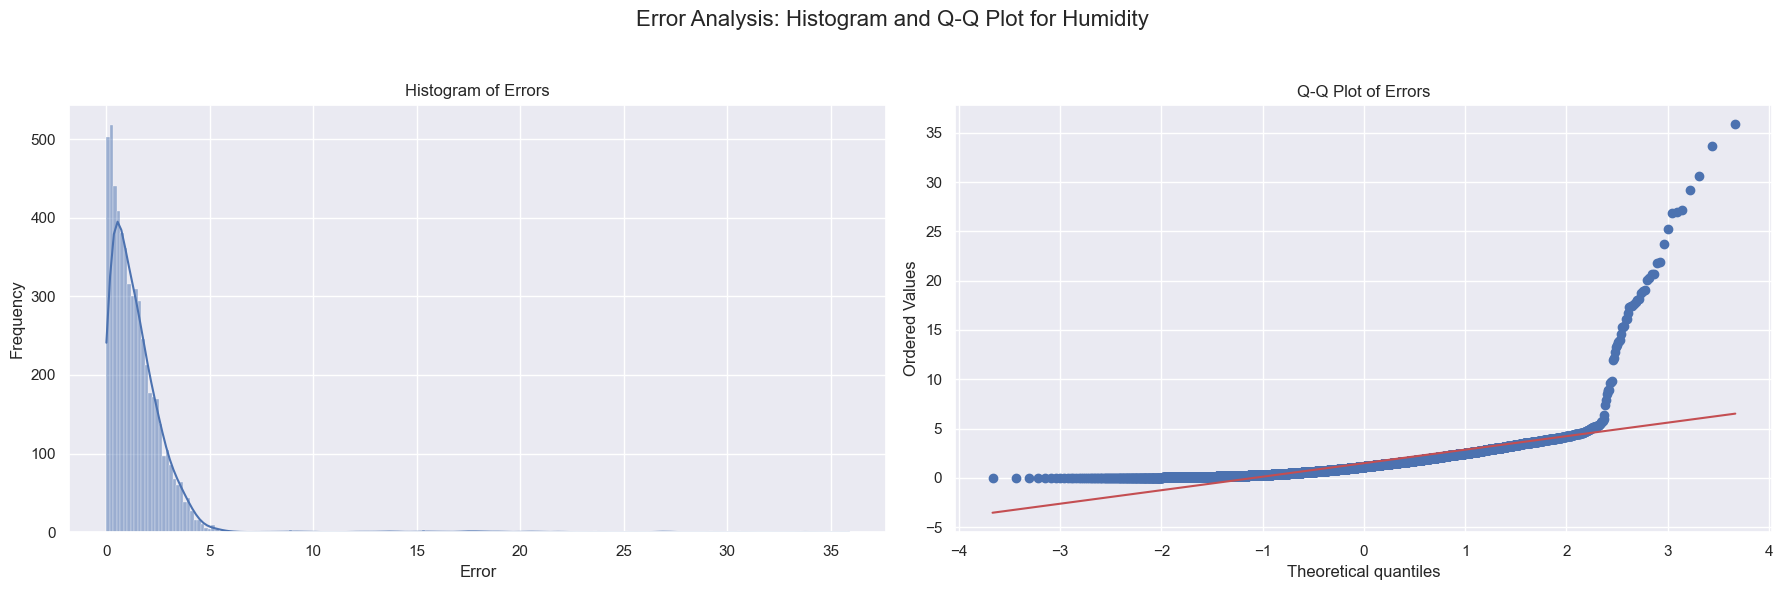

Correlation between actual and predicted Humidity: 0.23492027085786582


In [83]:
from scipy.stats import probplot

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot the histogram of errors on the first subplot
sns.histplot(predictions_humid_over_time['error_humidity'], kde=True, ax=axs[0])
axs[0].set_title('Histogram of Errors')
axs[0].set_xlabel('Error')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

# Plot the Q-Q plot of errors on the second subplot
probplot(predictions_humid_over_time['error_humidity'], dist="norm", plot=axs[1])
axs[1].set_title('Q-Q Plot of Errors')
axs[1].grid(True)

# Set a main title for the entire figure
fig.suptitle('Error Analysis: Histogram and Q-Q Plot for Humidity', fontsize=16)

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to accommodate the main title
plt.show()

correlation = predictions_humid_over_time['Actual_Humidity'].corr(predictions_humid_over_time['Predicted_Humidity'])
print(f"Correlation between actual and predicted Humidity: {correlation}")

# Plot the correlation
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Actual_Humidity', y='Predicted_Humidity', data=predictions_humid_over_time)
# plt.title(f'Correlation between Actual and Predicted Humidities: {correlation:.2f}')
# plt.xlabel('Actual Humidity')
# plt.ylabel('Predicted Humidity')
# plt.grid(True)
# plt.show()